# Exploratory Data Analysis 

### Questions

1. What is the distribution of ages within the dataset? Is there an age range that is more prevalent?
2. What is the distribution of genders?

### Loading Dataset

In [27]:
import os
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from IPython.display import display

In [31]:
imdb_mat_path = "../dataset/imdb_crop/imdb.mat"
wiki_mat_path = "../dataset/wiki_crop/wiki.mat"

imdb_mat = sio.loadmat(imdb_mat_path)
wiki_mat = sio.loadmat(wiki_mat_path)
    
num_imdb_images = len(imdb_mat["imdb"][0][0][0][0])
num_wiki_image = len(wiki_mat["wiki"][0][0][0][0])
imdb_mat_content = imdb_mat["imdb"][0][0]
wiki_mat_content = wiki_mat["wiki"][0][0]

imdb_dob = imdb_mat_content[0][0]  # date of birth (Matlab serial date number)
imdb_photo_taken = imdb_mat_content[1][0]  # year when the photo was taken
imdb_full_path = imdb_mat_content[2][0]  # path to file
imdb_gender = imdb_mat_content[3][0]  # 0 for female and 1 for male, NaN if unknown
imdb_name = imdb_mat_content[4][0]  # name of the celebrity
imdb_face_score = imdb_mat_content[6][0]  # detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
imdb_second_face_score = imdb_mat_content[7][0]  # detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.

wiki_dob = wiki_mat_content[0][0]  # date of birth (Matlab serial date number)
wiki_photo_taken = wiki_mat_content[1][0]  # year when the photo was taken
wiki_full_path = wiki_mat_content[2][0]  # path to file
wiki_gender = wiki_mat_content[3][0]  # 0 for female and 1 for male, NaN if unknown
wiki_name = wiki_mat_content[4][0]  # name of the celebrity
wiki_face_score = wiki_mat_content[6][0]  # detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
wiki_second_face_score = wiki_mat_content[7][0]  # detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
    
imdb_df = pd.DataFrame({
    'Year of Birth': imdb_dob, 
    'Photo Year': imdb_photo_taken, 
    'Image Path': imdb_full_path, 
    'Gender': imdb_gender, 
    'Name': imdb_name,
    'Face Score': imdb_face_score, 
    'Second Face Score': imdb_second_face_score
    })

wiki_df = pd.DataFrame({
    'Year of Birth': wiki_dob, 
    'Photo Year': wiki_photo_taken, 
    'Image Path': wiki_full_path, 
    'Gender': wiki_gender, 
    'Name': wiki_name,
    'Face Score': wiki_face_score, 
    'Second Face Score': wiki_second_face_score
    })

#  converting numpy lists to the first entry
imdb_df['Name'] = imdb_df['Name'].apply(lambda x: x[0])
imdb_df['Image Path'] = imdb_df['Image Path'].apply(lambda x: x[0])

#  dropping rows where image path doesn't exist
wiki_df = wiki_df[wiki_df["Name"].apply(len) > 0]

#  converting numpy lists to the first entry
wiki_df['Name'] = wiki_df['Name'].apply(lambda x: x[0])
wiki_df['Image Path'] = wiki_df['Image Path'].apply(lambda x: x[0])

imdb_df["Year of Birth"] = imdb_df["Year of Birth"] // 365
imdb_df["Age"] = imdb_df["Photo Year"] - imdb_df["Year of Birth"]
display(imdb_df)

wiki_df["Year of Birth"] = wiki_df["Year of Birth"] // 365
wiki_df["Age"] = wiki_df["Photo Year"] - wiki_df["Year of Birth"]
display(wiki_df)


,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
0,1900,1968,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,1.459693,1.118973,68
1,1900,1970,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,2.543198,1.852008,70
2,1900,1968,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,3.455579,2.985660,68
3,1900,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1.872117,NaN,68
4,1900,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1.158766,NaN,68
...,...,...,...,...,...,...,...,...
460718,1991,2011,08/nm3994408_rm761245696_1989-12-29_2011.jpg,0.0,Jane Levy,3.845884,NaN,20
460719,1991,2011,08/nm3994408_rm784182528_1989-12-29_2011.jpg,0.0,Jane Levy,-inf,NaN,20
460720,1991,2011,08/nm3994408_rm926592512_1989-12-29_2011.jpg,0.0,Jane Levy,-inf,NaN,20
460721,1991,2011,08/nm3994408_rm943369728_1989-12-29_2011.jpg,0.0,Jane Levy,4.450725,NaN,20


,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
0,1982,2009,17/10000217_1981-05-05_2009.jpg,1.0,Sami Jauhojärvi,4.300962,NaN,27
1,1926,1964,48/10000548_1925-04-04_1964.jpg,1.0,Dettmar Cramer,2.645639,1.949248,38
2,1949,2008,12/100012_1948-07-03_2008.jpg,1.0,Marc Okrand,4.329329,NaN,59
3,1931,1961,65/10001965_1930-05-23_1961.jpg,1.0,Aleksandar Matanović,-inf,NaN,30
4,1972,2012,16/10002116_1971-05-31_2012.jpg,0.0,Diana Damrau,3.408442,NaN,40
...,...,...,...,...,...,...,...,...
62323,1938,1963,49/9996949_1937-04-17_1963.jpg,1.0,Guus Haak,4.029268,NaN,25
62324,1948,1970,32/9997032_1947-07-30_1970.jpg,1.0,Nico Rijnders,-inf,NaN,22
62325,1974,2013,09/9998109_1972-12-27_2013.jpg,1.0,Michael Wiesinger,3.494303,NaN,39
62326,1983,2011,00/9999400_1981-12-13_2011.jpg,1.0,Johann Grugger,-inf,NaN,28


### Data Quality

In [32]:
#  Dropping duplicate entries
imdb_df = imdb_df.drop_duplicates()
wiki_df = wiki_df.drop_duplicates()

#  Removing genders with the value NaN, meaning that gender is unknown
imdb_df = imdb_df[(imdb_df["Gender"] == 1) | 
        (imdb_df["Gender"] == 0)]
wiki_df = wiki_df[(wiki_df["Gender"] == 1) | 
        (wiki_df["Gender"] == 0)]

#  Removing face scores with the value -inf, meaning that there was no face detected
imdb_df = imdb_df[imdb_df['Face Score'] != -np.inf]
wiki_df = wiki_df[wiki_df['Face Score'] != -np.inf]

#  Removing entries with invalid ages
imdb_df = imdb_df[(imdb_df["Age"] > 0) &
        (imdb_df["Age"] <= 100)]
wiki_df = wiki_df[(wiki_df["Age"] > 0) &
        (wiki_df["Age"] <= 100)]

#  Dropping entries with missing values
imdb_df.dropna()
wiki_df.dropna()

#  Removing entries where birthday is unknown (birth year == 0)
imdb_df = imdb_df[imdb_df["Year of Birth"] != 0]
wiki_df = wiki_df[wiki_df["Year of Birth"] != 0]

#  Removing entries with second face score, meaning multiple people in one image
imdb_df = imdb_df[pd.isna(imdb_df['Second Face Score'])]
display(imdb_df)

wiki_df = wiki_df[pd.isna(wiki_df['Second Face Score'])]
display(wiki_df)

,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
3,1900,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1.872117,NaN,68
4,1900,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1.158766,NaN,68
6,1925,2004,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0,Lauren Bacall,3.479189,NaN,79
7,1925,2004,02/nm0000002_rm1363385088_1924-9-16_2004.jpg,0.0,Lauren Bacall,3.870171,NaN,79
12,1925,1974,02/nm0000002_rm221957120_1924-9-16_1974.jpg,0.0,Lauren Bacall,4.096431,NaN,49
...,...,...,...,...,...,...,...,...
460715,1991,2011,08/nm3994408_rm73386752_1989-12-29_2011.jpg,0.0,Jane Levy,4.801987,NaN,20
460716,1991,2011,08/nm3994408_rm744468480_1989-12-29_2011.jpg,0.0,Jane Levy,2.370091,NaN,20
460718,1991,2011,08/nm3994408_rm761245696_1989-12-29_2011.jpg,0.0,Jane Levy,3.845884,NaN,20
460721,1991,2011,08/nm3994408_rm943369728_1989-12-29_2011.jpg,0.0,Jane Levy,4.450725,NaN,20


,Year of Birth,Photo Year,Image Path,Gender,Name,Face Score,Second Face Score,Age
0,1982,2009,17/10000217_1981-05-05_2009.jpg,1.0,Sami Jauhojärvi,4.300962,NaN,27
2,1949,2008,12/100012_1948-07-03_2008.jpg,1.0,Marc Okrand,4.329329,NaN,59
4,1972,2012,16/10002116_1971-05-31_2012.jpg,0.0,Diana Damrau,3.408442,NaN,40
5,1962,2012,02/10002702_1960-11-09_2012.jpg,0.0,Krista Tippett,4.748056,NaN,50
6,1939,1971,41/10003541_1937-09-27_1971.jpg,1.0,Bernie Whitebear,4.184828,NaN,32
...,...,...,...,...,...,...,...,...
62321,1938,1968,38/9996938_1937-02-15_1968.jpg,1.0,Coen Moulijn,3.868307,NaN,30
62322,1945,1968,46/9996946_1943-11-01_1968.jpg,1.0,Theo van Duivenbode,3.735573,NaN,23
62323,1938,1963,49/9996949_1937-04-17_1963.jpg,1.0,Guus Haak,4.029268,NaN,25
62325,1974,2013,09/9998109_1972-12-27_2013.jpg,1.0,Michael Wiesinger,3.494303,NaN,39


### Visualizing Dataset

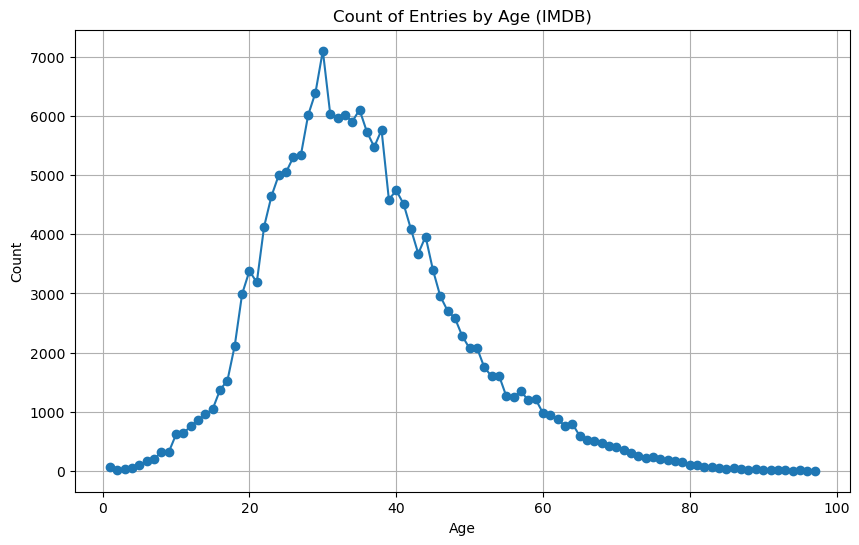

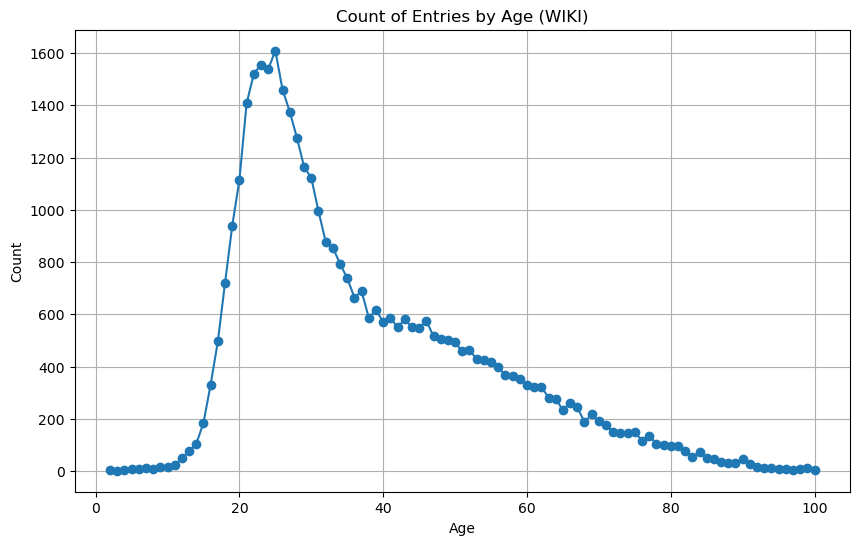

In [29]:
# Group by age and count the occurrences
age_counts = imdb_df['Age'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Count of Entries by Age (IMDB)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Group by age and count the occurrences
age_counts = wiki_df['Age'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Count of Entries by Age (WIKI)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

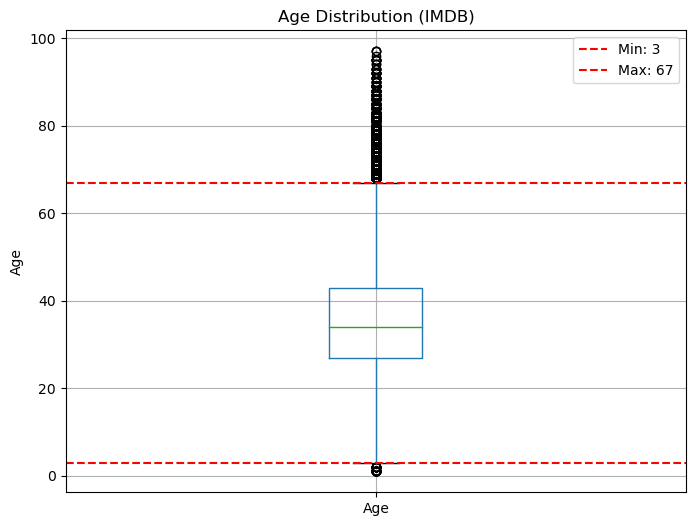

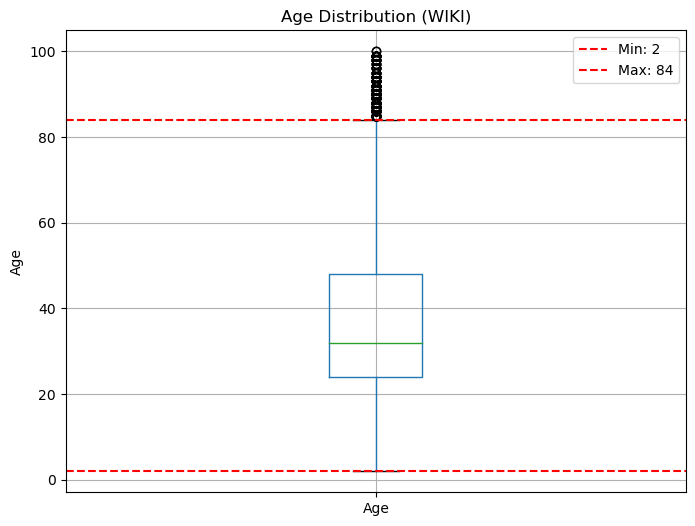

In [30]:
# Calculate min and max values excluding outliers
Q1 = imdb_df['Age'].quantile(0.25)
Q3 = imdb_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
min_value = imdb_df['Age'][imdb_df['Age'] >= lower_bound].min()
max_value = imdb_df['Age'][imdb_df['Age'] <= upper_bound].max()

# Create the boxplot
plt.figure(figsize=(8, 6))
imdb_df.boxplot(column='Age')

# Add dotted lines for min and max values
plt.axhline(y=min_value, color='red', linestyle='--', label=f'Min: {min_value}')
plt.axhline(y=max_value, color='red', linestyle='--', label=f'Max: {max_value}')

plt.title('Age Distribution (IMDB)')
plt.ylabel('Age')
plt.legend()
plt.show()

# Calculate min and max values excluding outliers
Q1 = wiki_df['Age'].quantile(0.25)
Q3 = wiki_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
min_value = wiki_df['Age'][wiki_df['Age'] >= lower_bound].min()
max_value = wiki_df['Age'][wiki_df['Age'] <= upper_bound].max()

# Create the boxplot
plt.figure(figsize=(8, 6))
wiki_df.boxplot(column='Age')

# Add dotted lines for min and max values
plt.axhline(y=min_value, color='red', linestyle='--', label=f'Min: {min_value}')
plt.axhline(y=max_value, color='red', linestyle='--', label=f'Max: {max_value}')

plt.title('Age Distribution (WIKI)')
plt.ylabel('Age')
plt.legend()
plt.show()

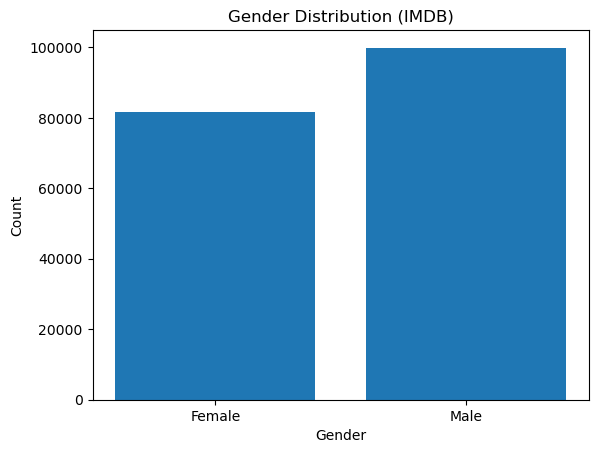

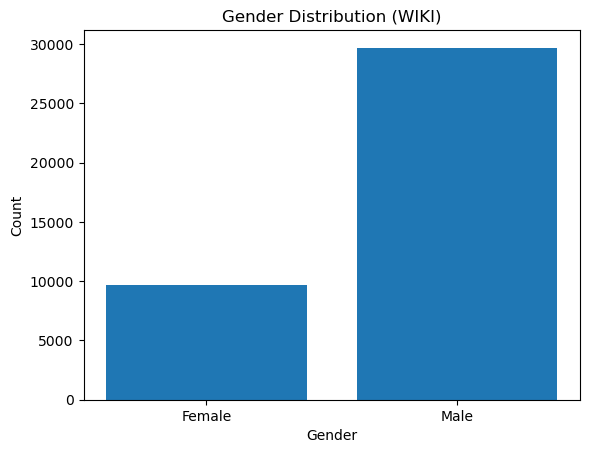

In [31]:
gender_counts = imdb_df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (IMDB)')

plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

gender_counts = wiki_df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (WIKI)')

plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

### Data Concerns

1) We found an entry of an animal celebrity in the IMDB dataset. There were other entries under the same name that were human. This suggested (and we verified) that there are entries under one name of an individual, but other faces under that same name may not be the same person. This is due to the case of having photos with multiple people. 
2) The overall age distribution for the IMDB and WIKI datasets are roughly the same. This means we won't have as sufficent data for people under roughly 20 years old, and people over 65.
3) The WIKI dataset contains far more males than females, which can bias our model towards aging characteristics more present in males than females.
4) Some images do not contain faces, are blurry, and unusable to train our model. This images were removed from the datasets.

### Next Steps

1. Image processing - crop all images to only face location, and make black and white to reduce computation power.
2. Image augmentation - rotating face, adding blur, etc to increase dataset sizes and account for real life variability.
3. Split the data in batches to not overload the memory
4. Model Creation
    - Split data into train & test
    - Create CNN using tensor flow
5. Test the model
5. Examine loss/model accuracy

### Updated Next Steps

1. Scale down to only Wiki dataset to reduce time and memory constraints.
    - Wiki contains 40,000 images, and will increase significantly after augmentation
    - Age is better distributed in wiki vs imdb
    - Significantly more males than females, but we can balance using augmentation
2. Augment data to balance male and female images and to add variety.
3. Cropping to only face location and converting images to grayscale is not necessary
    - We want to keep training and validation data sets consistent.